In [14]:
import cv2 as cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf

import seaborn as sns
from tensorflow.keras import datasets

%matplotlib inline

In [15]:
# GLOBAL VARIABLES
# annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)
styles=[':','-.','--','-',':','-.','--','-',':','-.','--','-']

## Data Preprocessing :-

In [16]:
df = datasets.mnist.load_data()

In [17]:
(x_train, y_train), (x_test, y_test) = df


In [18]:
# Count each digit in the training set

unique, counts = np.unique(y_train, return_counts=True)

for digit, count in zip(unique, counts):
    print(f"Digit {digit}: {count} images")

Digit 0: 5923 images
Digit 1: 6742 images
Digit 2: 5958 images
Digit 3: 6131 images
Digit 4: 5842 images
Digit 5: 5421 images
Digit 6: 5918 images
Digit 7: 6265 images
Digit 8: 5851 images
Digit 9: 5949 images


Random indexes :  [31930 51368 34621 44426 12104 21187 19788  8482]


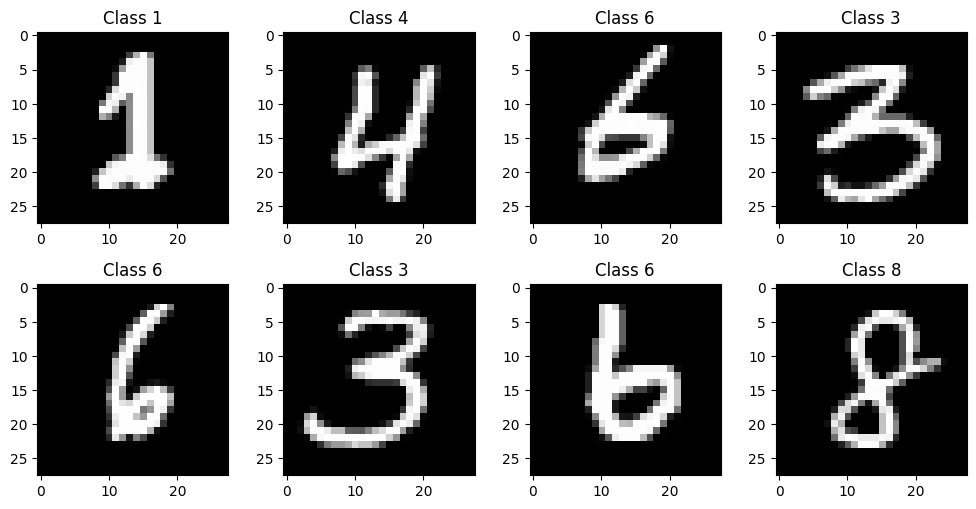

In [19]:
# Show image of training data

plt.figure(figsize = (10, 10)) 
rand_indexes = np.random.randint(0, x_train.shape[0], 8) # select 8 digits(0~9) randomly 
print("Random indexes : ",rand_indexes)

for index,im_index in enumerate(rand_indexes):
    plt.subplot(4, 4, index+1)
    plt.imshow(x_train[im_index], cmap = 'gray', interpolation = 'none')
    plt.title('Class %d' % y_train[im_index])
    
plt.tight_layout()

In [20]:
# sns.countplot(y_train)
y_train.shape

(60000,)

## Check for NaN Values :-


In [21]:
np.isnan(x_train).any(), np.isnan(x_test).any()

(False, False)

In [22]:
np.isnan(y_train).any(), np.isnan(y_test).any()

(False, False)

There are no NaN values in our dataset. There is no need to preprocess the data to deal with Nan's.

## Normalization and Reshaping :-


In [23]:
input_shape = (28, 28, 1)

x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_train=x_train / 255.0

x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
x_test=x_test/255.0

## Label Encoding :-

The labels for the training and the testing dataset are currently categorical and is not continuous. To include categorical dataset in our model, our labels should be converted to one-hot encodings.

For example, ```2``` becomes ```[0,0,1,0,0,0,0,0,0,0]``` and ```7``` becomes ```[0,0,0,0,0,0,0,1,0,0]```.

In [24]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

## Visualize Data :-


tf.Tensor([0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], shape=(10,), dtype=float32)


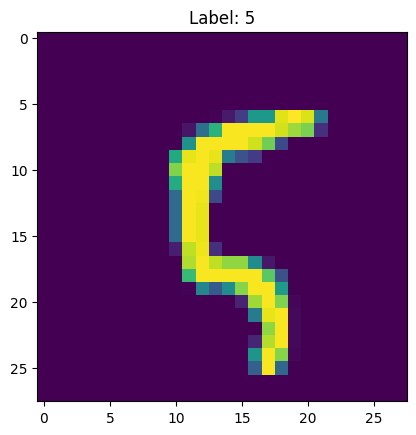

In [25]:
# Visualize a Single Image with its One-Hot Label
plt.imshow(x_train[100][:,:,0])
plt.title(f"Label: {np.argmax(y_train[100])}")
print(y_train[100])

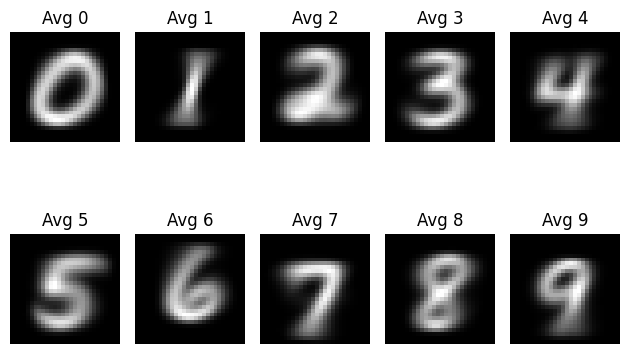

In [26]:
# Average image for each digit :-

for digit in range(10):
    avg_img = x_train[np.argmax(y_train, axis=1) == digit].mean(axis=0)
    plt.subplot(2, 5, digit+1)
    plt.imshow(avg_img[:,:,0], cmap='gray')
    plt.title(f"Avg {digit}")
    plt.axis('off')

plt.tight_layout()
plt.show()